# Clustering Crypto

In [392]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Fetching Cryptocurrency Data

In [393]:
url = "https://min-api.cryptocompare.com/data/all/coinlist"


In [394]:
from pathlib import Path
# Creating a DataFrame
file_path = ('./Resources/crypto_data.csv')
crypto_df = pd.read_csv(file_path)
crypto_df.head()
#df.dtypes

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Preprocessing

In [395]:
# Traspose the data
for column in crypto_df.columns:
  print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [396]:
# Remove unnecessary columns

crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [397]:
# Keep only cryptocurrencies that are on trading
#key_columns = ['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'TotalCoinsMined', 'TotalCoinSupply']
#for col in key_columns:
#    IsTrading[col] = IsTrading[col].replace('False', None)
for index, row in crypto_df.iterrows():
    if(index, row['IsTrading']) == "False":
        row['IsTrading'].replace('False', 'NaN', inplace=True)
 

In [398]:
#import numpy as np
#crypto_df = crypto_df.replace('False', np.NaN)

for column in crypto_df.columns:
  print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")     

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [399]:
print(index, row['IsTrading'])

1251 False


In [400]:
# Keep only cryptocurrencies with a working algorithm



In [401]:
# Remove the "IsTrading" column
crypto_df.drop(columns=['IsTrading'], inplace=True)
crypto_df.head()


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [402]:
# Removing rows with at least 1 null value
crypto_df.dropna(inplace=True)
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [403]:
# Removing rows with cryptocurrencies without coins mined
import numpy as np

crypto_df = crypto_df.replace(0, np.nan)
crypto_df = crypto_df.dropna(how='all', axis=0)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,NaN,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [404]:
# Dropping rows where there are 'N/A' text values
crypto_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [405]:
# Fetching the cryptocurrencies names prior to drop them from crypto_df
print(crypto_df['CoinName'])

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
1248     DivotyCoin
Name: CoinName, Length: 578, dtype: object


In [406]:
# Removig the cryptocurrency name since it's not going to be used on the clustering algorithm
#crypto_df.drop(columns=['CoinName'],inplace=True)
#crypto_df.head()
crypto_df.rename(columns = {'Unnamed: 0':'Coin'}, inplace = True) 
crypto_df.set_index(('Coin'), inplace=True)
crypto_df.head()


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [407]:
# Creating dummies variables for text features
crypto_dummies = pd.get_dummies(crypto_df)
crypto_dummies.head()

,TotalCoinsMined,CoinName_ ClubCoin,CoinName_1717 Masonic Commemorative Token,CoinName_1Credit,CoinName_404Coin,CoinName_42 Coin,CoinName_8BIT Coin,CoinName_AC3,CoinName_ALAX,CoinName_ARENON,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
Coin,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
# Standardizing data

crypto_scaled = StandardScaler().fit_transform(crypto_dummies)
print(crypto_scaled[0:5])

[[-0.11416167 -0.04163054 -0.04163054 ... -0.04163054 -0.04163054
  -0.04163054]
 [-0.09006124 -0.04163054 -0.04163054 ... -0.04163054 -0.04163054
  -0.04163054]
 [ 0.55458069 -0.04163054 -0.04163054 ... -0.04163054 -0.04163054
  -0.04163054]
 [-0.11375222 -0.04163054 -0.04163054 ... -0.04163054 -0.04163054
  -0.04163054]
 [-0.11170216 -0.04163054 -0.04163054 ... -0.04163054 -0.04163054
  -0.04163054]]


### Reducing Dimensions Using PCA

In [409]:
# Using PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [412]:
# Creating a DataFrame with the principal components data
crypto_pca = pd.DataFrame(
    data=crypto_pca,
    columns=["PC1", "PC2", "PC3"],
).set_index(crypto_dummies.index)
crypto_pca.head()


,PC1,PC2,PC3
Coin,,,
42,-0.161998,-0.114078,0.006487
404,-0.122801,-0.104651,-0.013376
1337,0.726388,-0.530231,-0.123815
BTC,-0.280616,0.030911,-0.152420
ETH,-0.096176,-0.126432,-0.322480


### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [414]:
# Import library KMeans
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_dummies)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {'k':k, 'inertia':inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x='k', y='inertia', xticks=k, title="Elbow Curve Crypto")

:Curve   [k]   (inertia)

Running K-Means with `k=<you best value for k here>`

In [415]:
# Initialize the K-Means model
model = KMeans(n_clusters = 3, random_state = 0)
# Fit the model
model.fit(crypto_pca)
# Predict clusters
predictions = model.predict(crypto_pca)
# Creating a new DataFrame including predicted clusters and cryptocurrencies features
crypto_pca['class'] = model.labels_
crypto_pca.head()


,PC1,PC2,PC3,class
Coin,,,,
42,-0.161998,-0.114078,0.006487,0
404,-0.122801,-0.104651,-0.013376,0
1337,0.726388,-0.530231,-0.123815,0
BTC,-0.280616,0.030911,-0.152420,0
ETH,-0.096176,-0.126432,-0.322480,0


In [427]:
#Creat new dataFrame including more colum
#crypto_pca.shape
#crypto_df.shape
cluster_df = pd.concat([crypto_df, crypto_pca], axis=1)
cluster_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,class
Coin,,,,,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.161998,-0.114078,0.006487,0
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.122801,-0.104651,-0.013376,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,0.726388,-0.530231,-0.123815,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.280616,0.030911,-0.152420,0
ETH,Ethereum,Ethash,PoW,1.076842e+08,0,-0.096176,-0.126432,-0.322480,0


### Visualizing Results

#### 3D-Scatter with Clusters

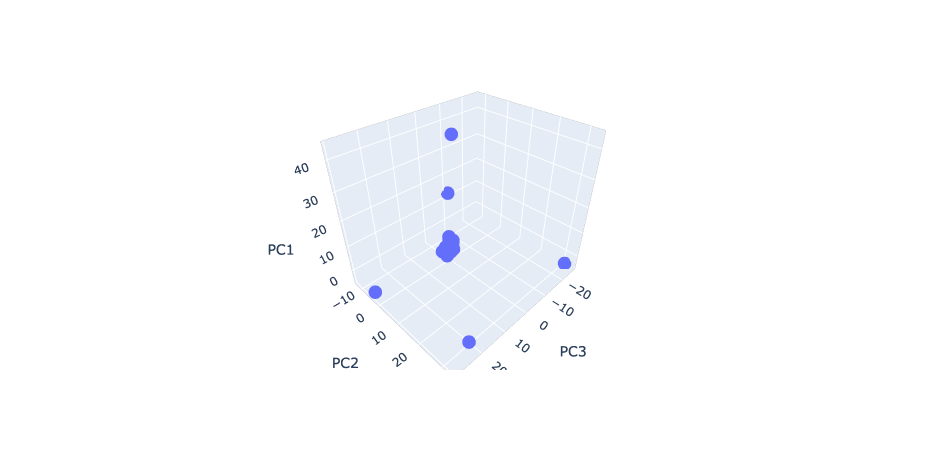

In [431]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    cluster_df,
    x="PC3",
    y="PC2",
    z="PC1",
    hover_name = "CoinName",
    hover_data = ["Algorithm"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [442]:

import hvplot.pandas
# Table with tradable cryptos
cluster_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 
                                 'TotalCoinsMined','class'], width=800)


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

#### Scatter Plot with Tradable Cryptocurrencies

In [448]:
# Scaling data to create the scatter plot

cluster_df["TotalCoinSupply"] = cluster_df["TotalCoinSupply"].astype("float")
cluster_df.dtypes

CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
PC1                float64
PC2                float64
PC3                float64
class                int32
dtype: object

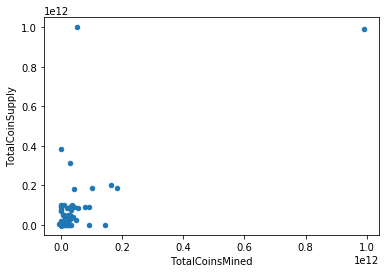

In [449]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
cluster_df.plot(kind='scatter', x = 'TotalCoinsMined', y = 'TotalCoinSupply')
